In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
customer=pd.read_csv("customer_behavior_analytcis.csv")

In [78]:
features=["total_purchases","avg_cart_value","total_time_spent","product_click","discount_counts"]
data=customer[features].copy()
data

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,7.0,129.34,52.17,18.0,0.0
1,22.0,24.18,9.19,15.0,7.0
2,2.0,32.18,90.69,50.0,2.0
3,25.0,26.85,11.22,16.0,10.0
4,7.0,125.45,34.19,30.0,3.0
...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0
995,5.0,68.36,75.41,43.0,1.0
996,18.0,19.53,28.77,18.0,8.0
997,4.0,28.97,72.27,57.0,3.0


In [79]:
df=pd.DataFrame(data)
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

     total_purchases  avg_cart_value  total_time_spent  product_click  \
97               NaN             NaN            117.04            NaN   
139              NaN             NaN             33.76            NaN   
212              NaN             NaN             42.70            NaN   
253              NaN             NaN             21.28            NaN   
294              NaN             NaN             47.80            NaN   
310              NaN             NaN             82.11            NaN   
317              NaN             NaN             55.19            NaN   
353              NaN             NaN             45.26            NaN   
409              NaN             NaN             22.95            NaN   
425              NaN             NaN             28.41            NaN   
549              NaN             NaN             51.12            NaN   
555              NaN             NaN             24.22            NaN   
605              NaN             NaN             26

In [80]:
df.dtypes

total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
dtype: object

In [81]:
df1=df.drop_duplicates()


In [82]:
df2 = df1.dropna()


In [83]:
# Example: Cap outliers using IQR
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [84]:
df_cleaned.min()

total_purchases      0.00
avg_cart_value      10.26
total_time_spent     5.12
product_click        4.00
discount_counts      0.00
dtype: float64

In [85]:
df_cleaned.max()

total_purchases      32.00
avg_cart_value      199.77
total_time_spent    119.82
product_click        73.00
discount_counts      18.00
dtype: float64

In [86]:
from sklearn.preprocessing  import StandardScaler

In [87]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df_cleaned)
df_scaled=pd.DataFrame(scaled_data, columns=df_cleaned.columns)

In [88]:
# K-Means Clustering Function
def k_means(data, k, max_iters=100, tol=1e-4):
    # Randomly initialize k centroids
    centroids = data.sample(n=k, random_state=42).reset_index(drop=True)

    for iteration in range(max_iters):
        # Step 2: Calculate distances from each point to the centroids
        distances = np.linalg.norm(data.values[:, np.newaxis] - centroids.values, axis=2)

        # Step 3: Assign each point to the nearest centroid
        cluster_assignments = np.argmin(distances, axis=1)

        # Step 4: Update centroids (mean of assigned points)
        new_centroids = centroids.copy()  # Create a copy of the current centroids
        for i in range(k):
            # Select data points assigned to the current cluster
            cluster_points = data[cluster_assignments == i]
            # If the cluster has points, update the centroid with their mean
            if not cluster_points.empty:
                new_centroids.iloc[i] = cluster_points.mean()

        # Step 5: Check for convergence (if centroids don't change significantly)
        if np.linalg.norm(new_centroids.values - centroids.values) < tol:
            print(f"Converged after {iteration + 1} iterations")
            break

        centroids = new_centroids  # Update centroids for the next iteration

    data['cluster'] = cluster_assignments
    return data, centroids

# Run K-Means with k=3
k = 3
clustered_data, final_centroids = k_means(df_scaled, k)

print("\nFinal Cluster Assignments:\n", clustered_data)
print("\nFinal Centroids:\n", final_centroids)


Converged after 4 iterations

Final Cluster Assignments:
      total_purchases  avg_cart_value  total_time_spent  product_click  \
0          -0.650016        0.976989          0.083671      -0.631233   
1           1.488251       -0.933132         -1.227367      -0.815493   
2          -1.362771       -0.787821          1.258663       1.334197   
3           1.915905       -0.884635         -1.165445      -0.754073   
4          -0.650016        0.906331         -0.464781       0.105803   
..               ...             ...               ...            ...   
972        -0.935118       -0.198219          0.709906       1.334197   
973        -0.935118       -0.130649          0.792571       0.904259   
974         0.918047       -1.017595         -0.630110      -0.631233   
975        -1.077669       -0.846127          0.696790       1.764134   
976         2.486109       -0.658675         -1.202965      -0.754073   

     discount_counts  cluster  
0          -0.959583        1  
1

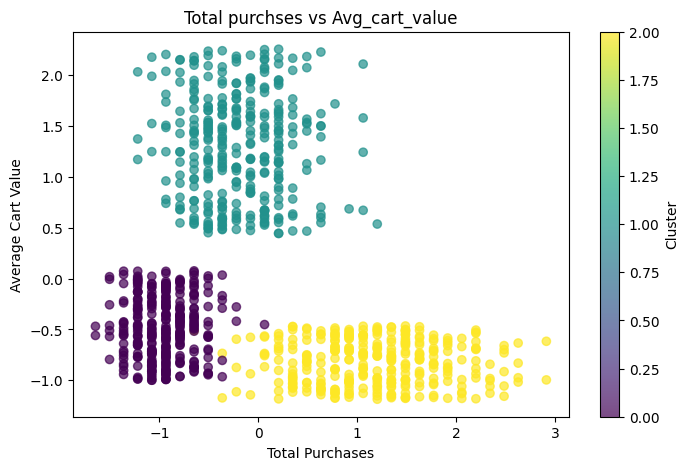

In [100]:
plt.figure(figsize=(8,5))
plt.scatter(x=clustered_data['total_purchases'], 
            y=clustered_data['avg_cart_value'], 
            c=clustered_data['cluster'],  # Assuming it's a column with cluster labels
            cmap='viridis', 
            alpha=0.7)  # Transparency for better visualization

plt.xlabel('Total Purchases')
plt.ylabel('Average Cart Value')
plt.title('Total purchses vs Avg_cart_value')
plt.colorbar(label='Cluster')
plt.show()



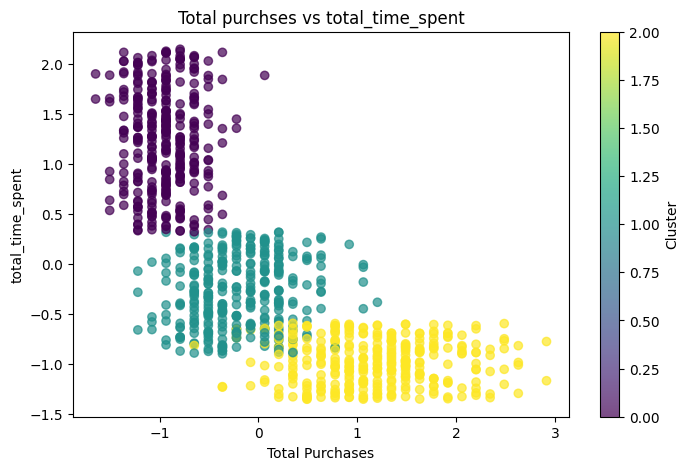

In [101]:
plt.figure(figsize=(8,5))
plt.scatter(x=clustered_data['total_purchases'], 
            y=clustered_data['total_time_spent'], 
            c=clustered_data['cluster'],  # Assuming it's a column with cluster labels
            cmap='viridis', 
            alpha=0.7)  # Transparency for better visualization

plt.xlabel('Total Purchases')
plt.ylabel('total_time_spent')
plt.title('Total purchses vs total_time_spent')
plt.colorbar(label='Cluster')
plt.show()


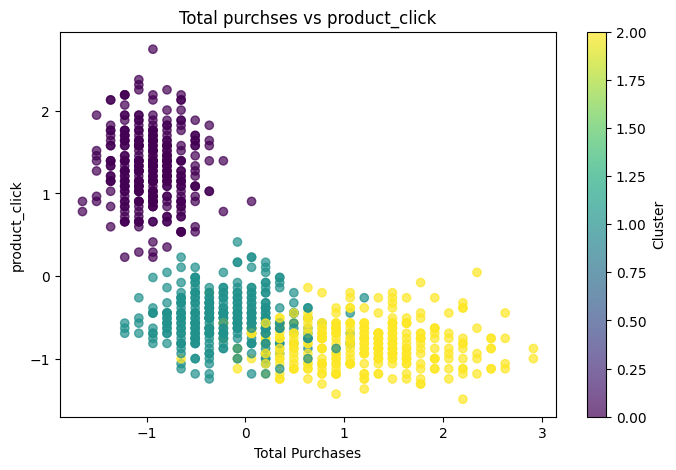

In [102]:
plt.figure(figsize=(8,5))
plt.scatter(x=clustered_data['total_purchases'], 
            y=clustered_data['product_click'], 
            c=clustered_data['cluster'],  # Assuming it's a column with cluster labels
            cmap='viridis', 
            alpha=0.7)  # Transparency for better visualization

plt.xlabel('Total Purchases')
plt.ylabel('product_click')
plt.title('Total purchses vs product_click')
plt.colorbar(label='Cluster')
plt.show()

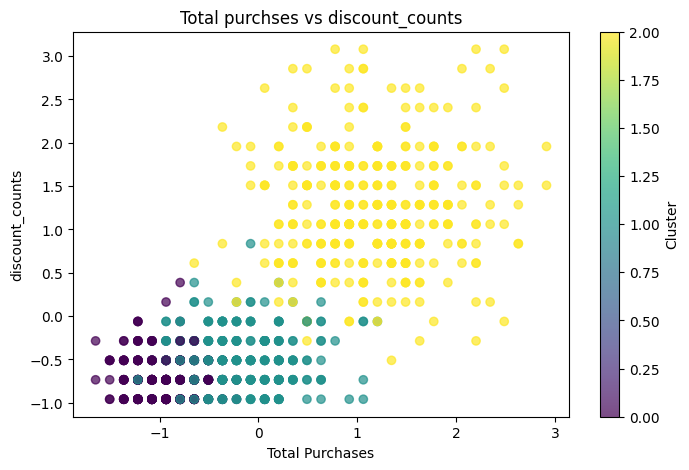

In [103]:
plt.figure(figsize=(8,5))
plt.scatter(x=clustered_data['total_purchases'], 
            y=clustered_data['discount_counts'], 
            c=clustered_data['cluster'],  # Assuming it's a column with cluster labels
            cmap='viridis', 
            alpha=0.7)  # Transparency for better visualization

plt.xlabel('Total Purchases')
plt.ylabel('discount_counts')
plt.title('Total purchses vs discount_counts')
plt.colorbar(label='Cluster')
plt.show()

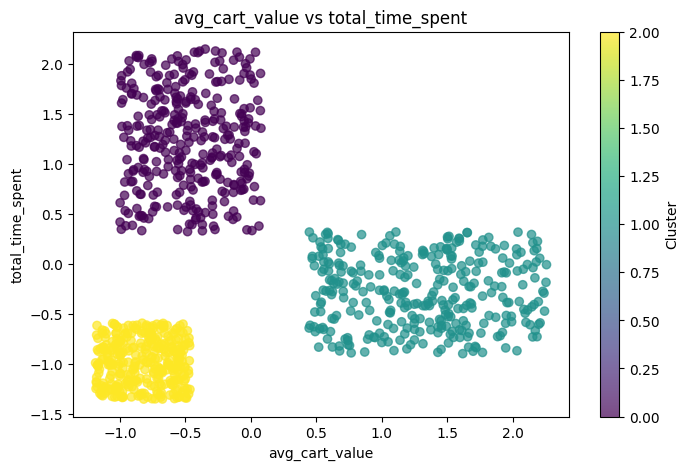

In [104]:
plt.figure(figsize=(8,5))
plt.scatter(x=clustered_data['avg_cart_value'], 
            y=clustered_data['total_time_spent'], 
            c=clustered_data['cluster'],  # Assuming it's a column with cluster labels
            cmap='viridis', 
            alpha=0.7)  # Transparency for better visualization

plt.xlabel('avg_cart_value')
plt.ylabel('total_time_spent')
plt.title('avg_cart_value vs total_time_spent')
plt.colorbar(label='Cluster')
plt.show()

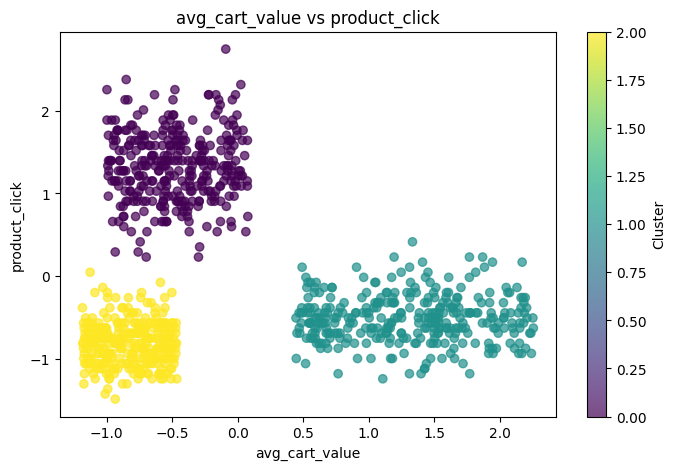

In [105]:
plt.figure(figsize=(8,5))
plt.scatter(x=clustered_data['avg_cart_value'], 
            y=clustered_data['product_click'], 
            c=clustered_data['cluster'],  # Assuming it's a column with cluster labels
            cmap='viridis', 
            alpha=0.7)  # Transparency for better visualization

plt.xlabel('avg_cart_value')
plt.ylabel('product_click')
plt.title('avg_cart_value vs product_click')
plt.colorbar(label='Cluster')
plt.show()

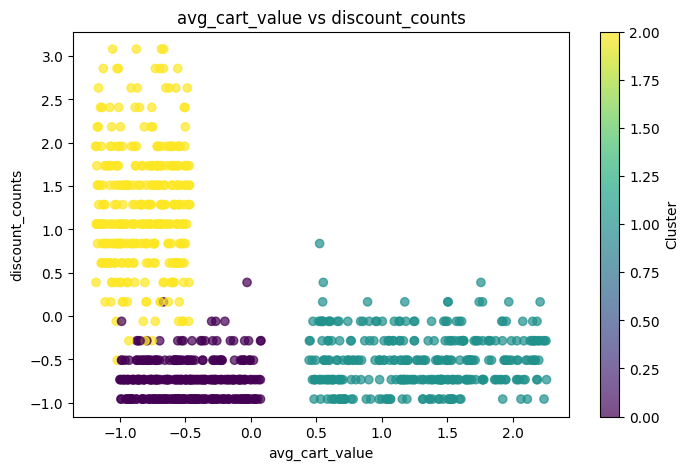

In [106]:
plt.figure(figsize=(8,5))
plt.scatter(x=clustered_data['avg_cart_value'], 
            y=clustered_data['discount_counts'], 
            c=clustered_data['cluster'],  # Assuming it's a column with cluster labels
            cmap='viridis', 
            alpha=0.7)  # Transparency for better visualization

plt.xlabel('avg_cart_value')
plt.ylabel('discount_counts')
plt.title('avg_cart_value vs discount_counts')
plt.colorbar(label='Cluster')
plt.show()

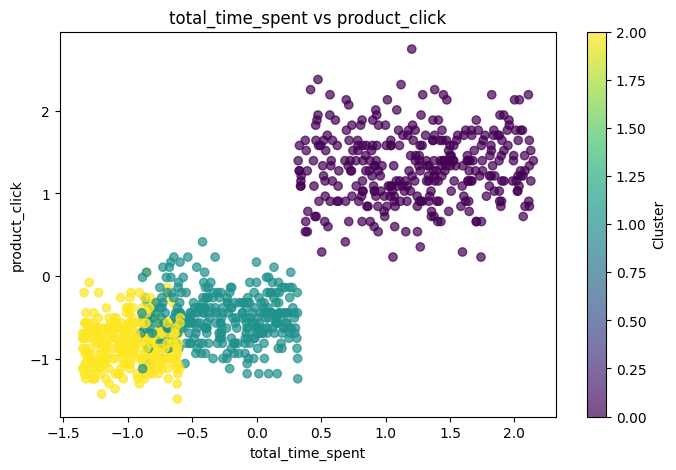

In [107]:
plt.figure(figsize=(8,5))
plt.scatter(x=clustered_data['total_time_spent'], 
            y=clustered_data['product_click'], 
            c=clustered_data['cluster'],  # Assuming it's a column with cluster labels
            cmap='viridis', 
            alpha=0.7)  # Transparency for better visualization

plt.xlabel('total_time_spent')
plt.ylabel('product_click')
plt.title('total_time_spent vs product_click')
plt.colorbar(label='Cluster')
plt.show()


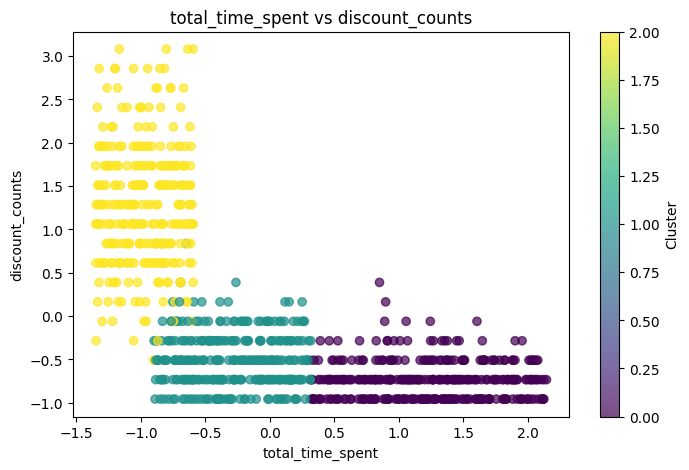

In [108]:
plt.figure(figsize=(8,5))
plt.scatter(x=clustered_data['total_time_spent'], 
            y=clustered_data['discount_counts'], 
            c=clustered_data['cluster'],  # Assuming it's a column with cluster labels
            cmap='viridis', 
            alpha=0.7)  # Transparency for better visualization

plt.xlabel('total_time_spent')
plt.ylabel('discount_counts')
plt.title('total_time_spent vs discount_counts')
plt.colorbar(label='Cluster')
plt.show()

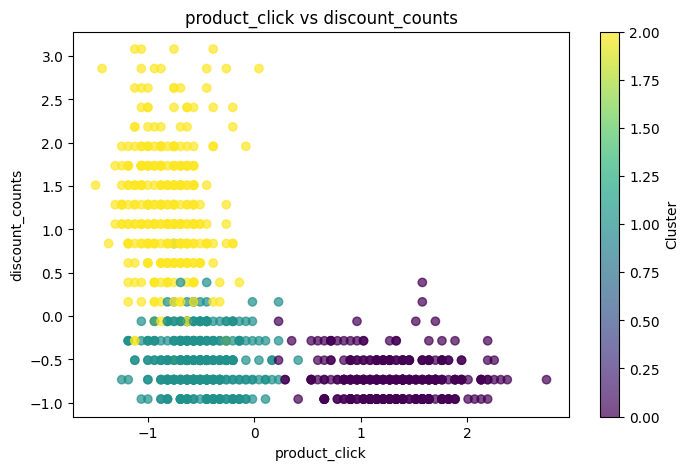

In [109]:
plt.figure(figsize=(8,5))
plt.scatter(x=clustered_data['product_click'], 
            y=clustered_data['discount_counts'], 
            c=clustered_data['cluster'],  # Assuming it's a column with cluster labels
            cmap='viridis', 
            alpha=0.7)  # Transparency for better visualization

plt.xlabel('product_click')
plt.ylabel('discount_counts')
plt.title('product_click vs discount_counts')
plt.colorbar(label='Cluster')
plt.show()